### TWITTER SENTIMENT ANALYSIS

##### Machine learning based:

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import os
import  matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import LancasterStemmer
import re
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Initialize the data
df = pd.read_csv("../NLP Notes/training.1600000.processed.noemoticon.csv",encoding='ISO-8859-1')
df.head()

df

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1048567,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048568,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048569,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048570,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?


In [3]:
print(df.head())

   polarity of tweet   id of the tweet             date of the tweet  \
0                   0       1467810672  Mon Apr 06 22:19:49 PDT 2009   
1                   0       1467810917  Mon Apr 06 22:19:53 PDT 2009   
2                   0       1467811184  Mon Apr 06 22:19:57 PDT 2009   
3                   0       1467811193  Mon Apr 06 22:19:57 PDT 2009   
4                   0       1467811372  Mon Apr 06 22:20:00 PDT 2009   

      query           user                                 text of the tweet   
0  NO_QUERY  scotthamilton  is upset that he can't update his Facebook by ...  
1  NO_QUERY       mattycus  @Kenichan I dived many times for the ball. Man...  
2  NO_QUERY        ElleCTF    my whole body feels itchy and like its on fire   
3  NO_QUERY         Karoli  @nationwideclass no, it's not behaving at all....  
4  NO_QUERY       joy_wolf                      @Kwesidei not the whole crew   


In [4]:
df.columns = ['Sentiment','id','date','query','user','text']
df.head()

,Sentiment,id,date,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
df =df[['Sentiment','text']]

In [6]:
df.columns

Index(['Sentiment', 'text'], dtype='object')

In [7]:
df.Sentiment.value_counts()

Sentiment
0    799996
4    248576
Name: count, dtype: int64

In [8]:
df["Sentiment"] = df["Sentiment"].replace({4:1})
df.Sentiment.value_counts()


Sentiment
0    799996
1    248576
Name: count, dtype: int64

* 0 represent Negative sentiment
* 1 represents Positive sentiment

* The data is imbalanced therefore we will downsample the data to have same count for each sentiment

* Downsampling of the data set:

In [9]:
from sklearn.utils import resample

In [10]:
# Majority class 0
dfMajority = df[df['Sentiment'] ==0]
# Minority class 1
dfMinority = df[df['Sentiment'] ==1]

In [11]:
dfMinority.shape

(248576, 2)

In [12]:
# downsample the majority class
dfMajorityDownsampled = resample(dfMajority,
                                 replace=False,
                                 n_samples=len(dfMinority),
                                 random_state=1234)

In [13]:
frames = [dfMajorityDownsampled, dfMinority]

df = pd.concat(frames)
df.head()

,Sentiment,text
74567,0,Wow slept for almost 12hours. Sleepy me!! Uni ...
668722,0,gets bored with an idea too easily ... like tw...
286706,0,To my girls - sorry i've been a homebody latel...
632911,0,BK once again for the weekend...If it wasnt fo...
356735,0,@DonnieWahlberg Now why didn't you do that las...


In [14]:
df.Sentiment.value_counts()

Sentiment
0    248576
1    248576
Name: count, dtype: int64

#### Data Preprocessing

1. removing stop words
2. removing punctuations
3. Stemmer
4. removing tags
5. removing special characters
6. lowercase conversion

In [15]:
## remove stopwords and punctuation marks
nltk.download('stopwords')
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()

corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])

497152
Wow slept for almost 12hours. Sleepy me!! Uni now, boo! I wanna stay home, drink tea and watch house... 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ChristineKakina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('wordnet')
# %%time
final_corpus = []
final_corpus_joined = []
for i in df.index:

    text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    #Convert to lowercase
    text = text.lower()
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)

    ##Convert to list from string
    text = text.split()

    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text
            if not word in stuff_to_be_removed]
    text1 = " ".join(text)
    final_corpus.append(text)
    final_corpus_joined.append(text1)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ChristineKakina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Storing cleaned data separately

In [48]:
dataCleaned = pd.DataFrame()
dataCleaned["text"] = final_corpus_joined
dataCleaned["Sentiment"] = df["Sentiment"].values

In [49]:
dataCleaned['Sentiment'].value_counts()


Sentiment
0    248576
1    248576
Name: count, dtype: int64

In [50]:
dataCleaned.head()

,text,Sentiment
0,wow slept almost hour sleepy uni boo wanna sta...,0
1,get bored idea easily like twitter,0
2,girl sorry homebody lately dont feel well does...,0
3,bk weekend wasnt puppy stay as,0
4,donniewahlberg last night atlanta,0


### EDA


In [53]:
dataEda = pd.DataFrame()
dataEda['text'] = final_corpus
dataEda['Sentiment'] = df["Sentiment"].values
dataEda.head()

,text,Sentiment
0,"[wow, slept, almost, hour, sleepy, uni, boo, w...",0
1,"[get, bored, idea, easily, like, twitter]",0
2,"[girl, sorry, homebody, lately, dont, feel, we...",0
3,"[bk, weekend, wasnt, puppy, stay, as]",0
4,"[donniewahlberg, last, night, atlanta]",0


In [54]:
# Storing positive data seperately
positive = dataEda[dataEda['Sentiment'] == 1]
positiveList = positive['text'].tolist()

# Storing negative data seperately

negative = dataEda[dataEda['Sentiment'] == 0]
negativeList = negative['text'].tolist()

In [56]:
positiveAll = " ".join([word for sent in positiveList for word in sent ])
negativeAll = " ".join([word for sent in negativeList for word in sent ])

### Word cloud positive data

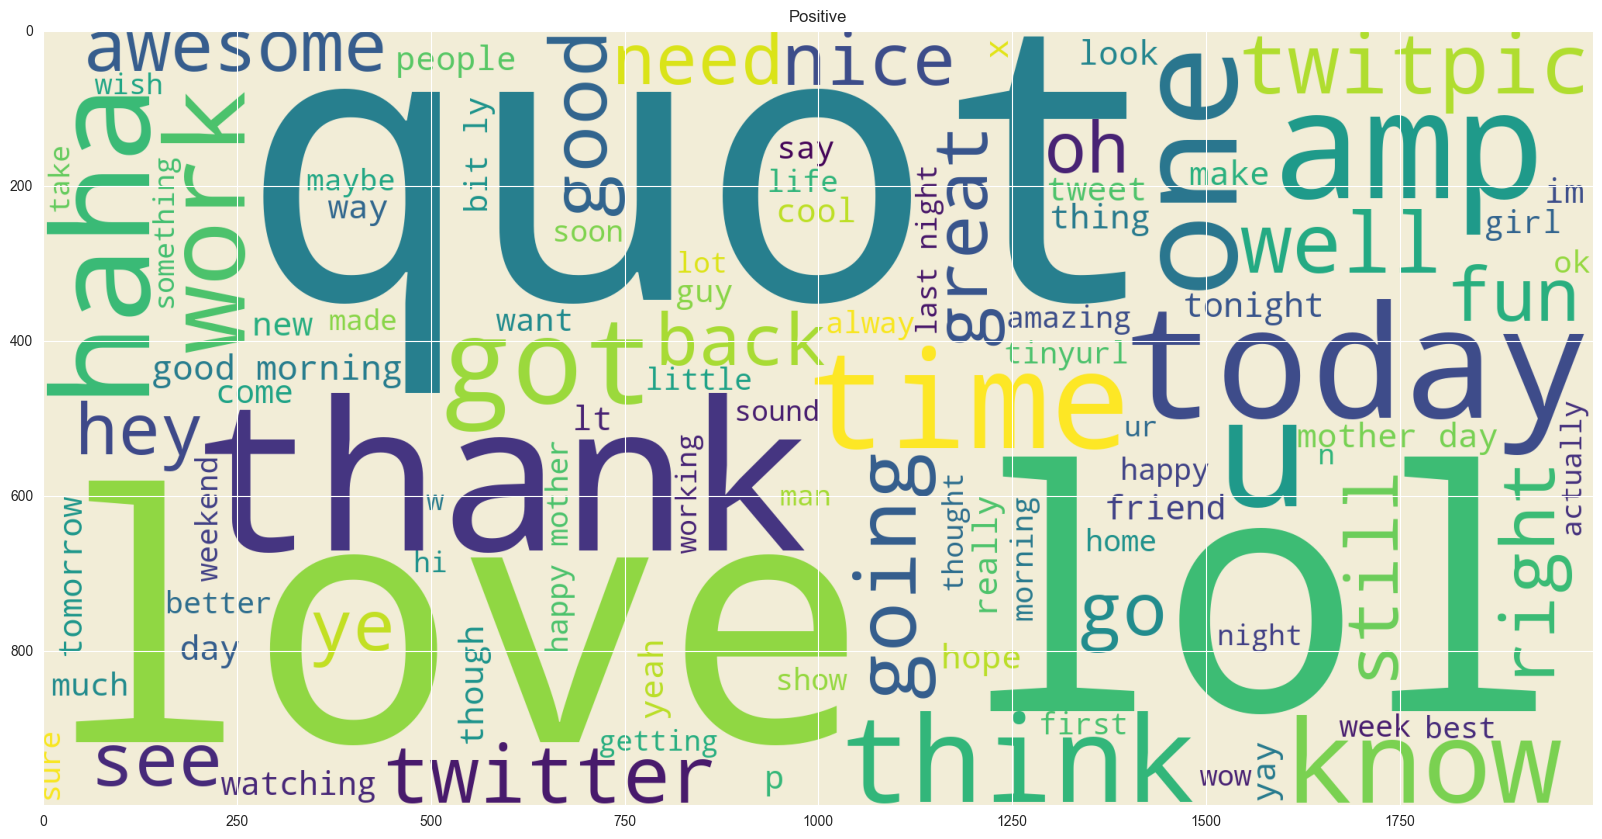

In [57]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(positiveAll)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

**Inference:**
* Positive data has words like Thank, love , LOL, Haha ets
* Negative data has words like work, sad, tired, suck sorry <br>
Some of the words are still common in both such as Lol, quot

#### One word count

In [65]:
def get_count(data):
    dic = {}
    for i in data:
        for j in i:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1

    return(dic)
countCorpus = get_count(positiveList)

In [66]:
countCorpus = pd.DataFrame({"word":countCorpus.keys(),"count":countCorpus.values()})
countCorpus = countCorpus.sort_values(by = "count", ascending = False)

In [67]:
countCorpus

,word,count
485,good,20273
84,day,19789
0,love,14969
181,http,14800
196,quot,14567
...,...,...
80922,dylanjthomas,1
80921,dignified,1
80920,kajol,1
80919,archana,1


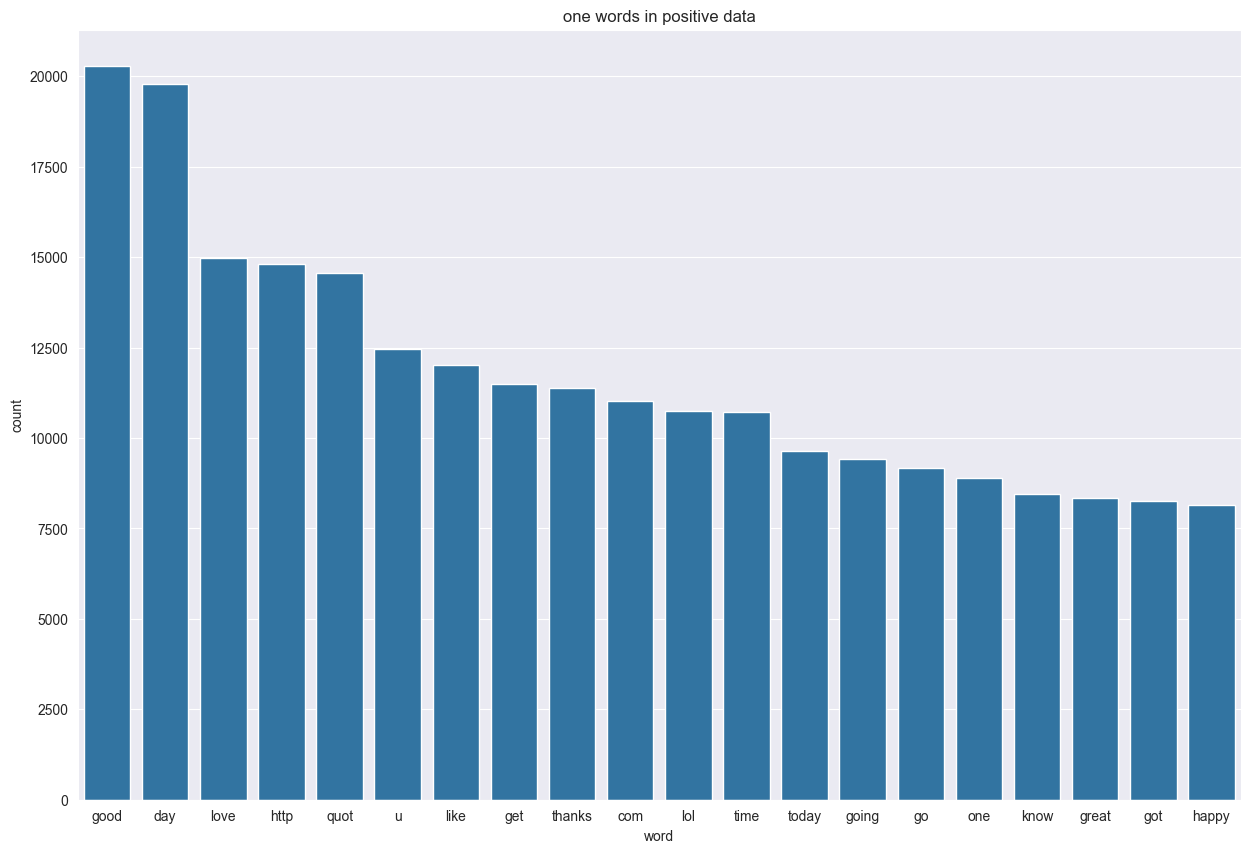

In [69]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x = countCorpus["word"][:20], y = countCorpus["count"][:20])
plt.title('one words in positive data')
plt.show()

In [73]:
def get_count(data):
    dic = {}
    for i in data:
        for j in i:
            if j not in dic:
                dic[j] = 1
            else:
                dic[j] += 1

    #dic = dict(sorted(dic.items() , key = lambda x:x[1],reverse=True))
    return (dic)


countCorpus = get_count(negativeList)

In [74]:
countCorpus = pd.DataFrame({"word":countCorpus.keys(),"count":countCorpus.values()})
countCorpus = countCorpus.sort_values(by = "count", ascending = False)

In [75]:
countCorpus

,word,count
121,day,16282
14,get,15058
58,go,14950
142,work,14629
18,like,12906
...,...,...
70129,shaawe,1
70128,beboooo,1
70127,nisunis,1
70126,ood,1


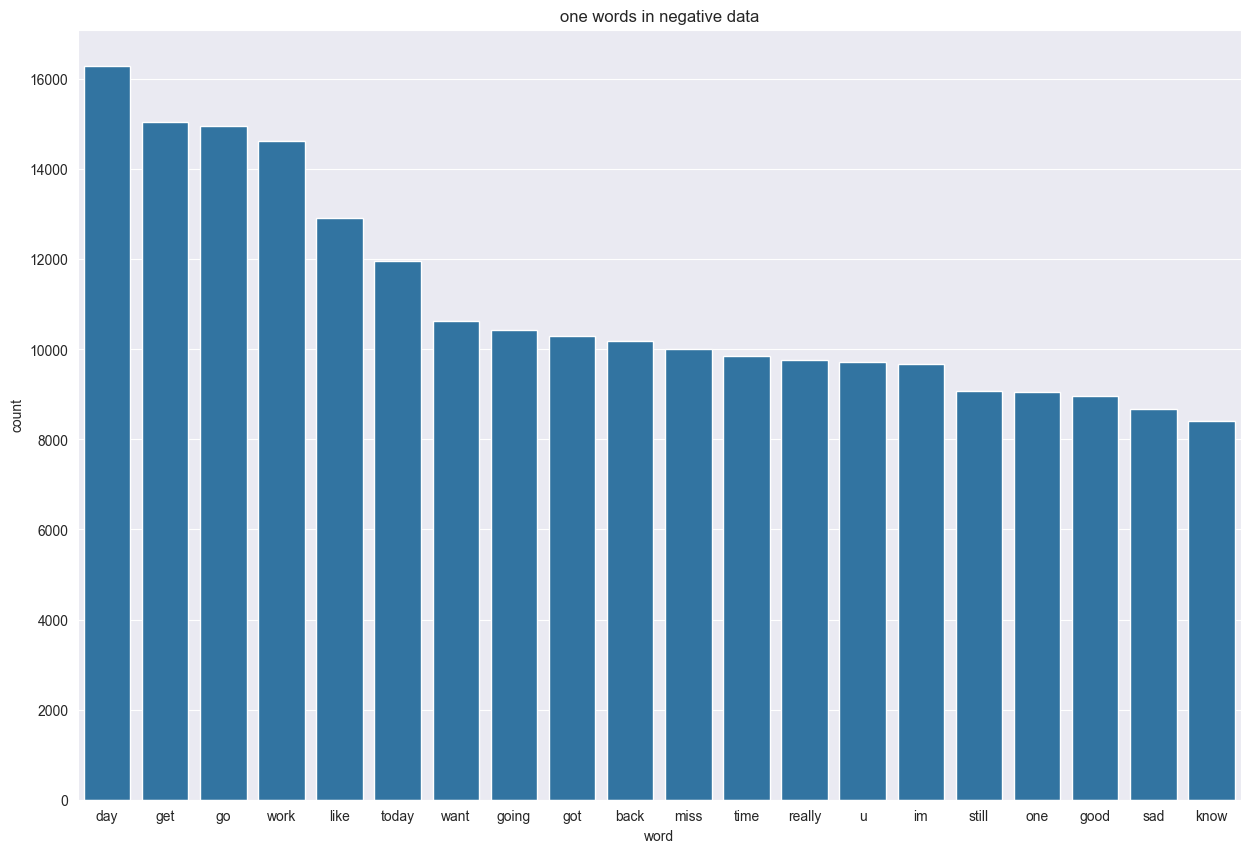

In [77]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x = countCorpus["word"][:20], y = countCorpus["count"][:20])
plt.title('one words in negative data')
plt.show()

**Inference**
* Positive data has words like good, day, thanks, great, happy
* Negative data has words like work, miss, sad etc

## Classification
### Naive bayes for sentiment analysis

In [80]:
def get_tweets_for_model(cleanedTokensList):
    for tweetTokens in cleanedTokensList:
        yield dict([token, True] for token in tweetTokens)

positiveTokensForModel = get_tweets_for_model(positiveList)
negativeTokensForModel = get_tweets_for_model(negativeList)

In [81]:
positiveTokensForModel


<generator object get_tweets_for_model at 0x0000012E186589E0>

In [83]:
import random

positiveDataset = [(review_dict, "Positive")
                     for review_dict in positiveTokensForModel]

negativeDataset = [(review_dict, "Negative")
                     for review_dict in negativeTokensForModel]
dataset = positiveDataset + negativeDataset

random.shuffle(dataset)

trainData = dataset[:333091]
testData = dataset[333091:]

In [94]:
trainData

[]

In [85]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print(" Training Accuracy is:", round(classify.accuracy(classifier, train_data),2)*100)

print("Testing Accuracy is:", round(classify.accuracy(classifier, test_data),2)*100)

print(classifier.show_most_informative_features(10))

 Training Accuracy is: 86.0
Testing Accuracy is: 76.0
Most Informative Features
             squarespace = True           Negati : Positi =     63.8 : 1.0
                 fawcett = True           Negati : Positi =     56.4 : 1.0
                    iran = True           Negati : Positi =     49.8 : 1.0
                  farrah = True           Negati : Positi =     44.2 : 1.0
                hayfever = True           Negati : Positi =     34.7 : 1.0
                hotwords = True           Positi : Negati =     32.3 : 1.0
                coughing = True           Negati : Positi =     30.2 : 1.0
          peterfacinelli = True           Negati : Positi =     29.4 : 1.0
           heartbreaking = True           Negati : Positi =     27.7 : 1.0
                  unwell = True           Negati : Positi =     26.3 : 1.0
None


### TFIDF for sentiment analysis


In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(dataCleaned['text'])
y = dataCleaned['Sentiment']

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify = y)

In [88]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [89]:
def metrics(y_train,y_train_pred,y_test,y_test_pred):
  print("training accuracy = ",round(accuracy_score(y_train,y_train_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize = 'all')
  print(classification_report(y_train,y_train_pred))
  plt.show()

  print("testing accuracy = ",round(accuracy_score(y_test,y_test_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize = 'all')
  print(classification_report(y_test,y_test_pred))
  plt.show()

### Multinomial NB

training accuracy =  85.0
              precision    recall  f1-score   support

           0       0.83      0.87      0.85    198860
           1       0.87      0.82      0.84    198861

    accuracy                           0.85    397721
   macro avg       0.85      0.85      0.85    397721
weighted avg       0.85      0.85      0.85    397721



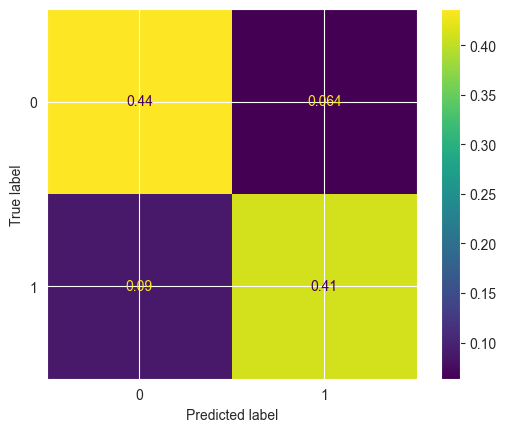

testing accuracy =  76.0
              precision    recall  f1-score   support

           0       0.75      0.80      0.77     49716
           1       0.78      0.73      0.76     49715

    accuracy                           0.76     99431
   macro avg       0.77      0.76      0.76     99431
weighted avg       0.77      0.76      0.76     99431



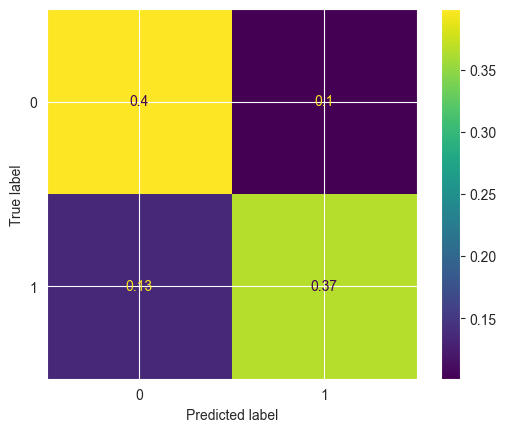

In [90]:
NB = MultinomialNB()
NB.fit(X_train,y_train)
y_train_pred = NB.predict(X_train)
y_test_pred = NB.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

### Linear SVC


training accuracy =  90.0
              precision    recall  f1-score   support

           0       0.90      0.89      0.90    198860
           1       0.89      0.90      0.90    198861

    accuracy                           0.90    397721
   macro avg       0.90      0.90      0.90    397721
weighted avg       0.90      0.90      0.90    397721



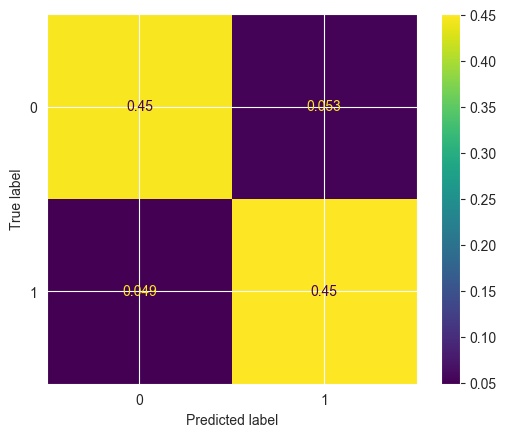

testing accuracy =  77.0
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     49716
           1       0.77      0.79      0.78     49715

    accuracy                           0.77     99431
   macro avg       0.77      0.77      0.77     99431
weighted avg       0.77      0.77      0.77     99431



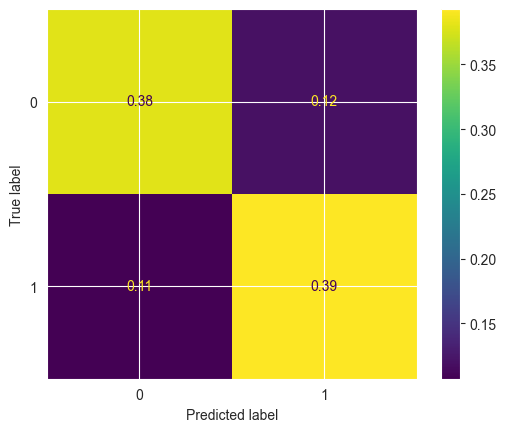

In [91]:
svc = LinearSVC()
svc.fit(X_train,y_train)
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

### Logistic regression


training accuracy =  82.0
              precision    recall  f1-score   support

           0       0.83      0.80      0.82    198860
           1       0.81      0.84      0.82    198861

    accuracy                           0.82    397721
   macro avg       0.82      0.82      0.82    397721
weighted avg       0.82      0.82      0.82    397721



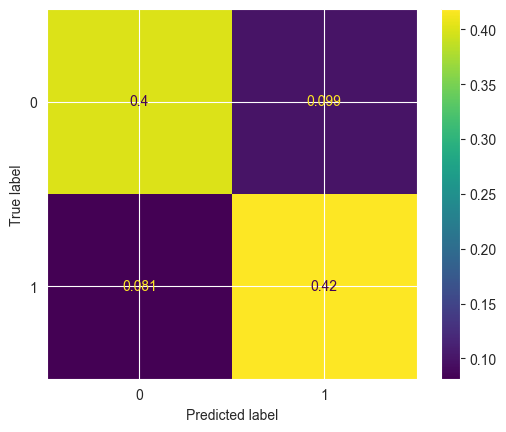

testing accuracy =  78.0
              precision    recall  f1-score   support

           0       0.79      0.76      0.77     49716
           1       0.77      0.80      0.78     49715

    accuracy                           0.78     99431
   macro avg       0.78      0.78      0.78     99431
weighted avg       0.78      0.78      0.78     99431



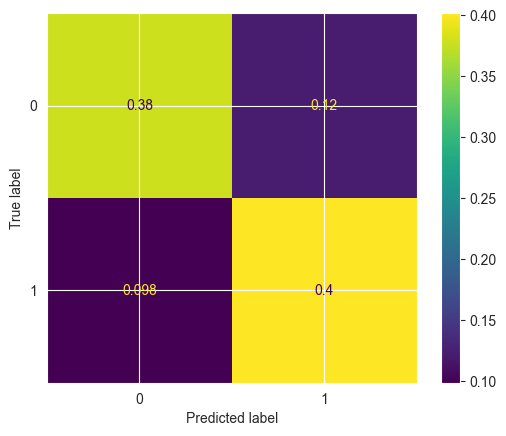

In [92]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

## Conclusion

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|Naive Bayes|86%|76%|
|Multinomial NB| 85%|76%|
|linear SVC|90%|77%|
|Logistic|83%|78%|
